## Rajath Chikkatur Srinivasa
## 002552425

In [5]:
# imports
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk, os
nltk.download('punkt')
nltk.download('stopwords')
# importing required libraries
import re, random, os, nltk,spacy, os, time, datetime
# from collections import Counter, defaultdict
import seaborn as sns
from nltk import bigrams, trigrams
# all sklearn imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')
# importing models
#importing classifier types
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
#importing metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import torch
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
import os
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset, random_split
from numpy import array
import logging
logging.getLogger('tensorflow').disabled = True
import torch
import spacy
nlp = spacy.load("en_core_web_sm")
from gensim.models import KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#installs
!pip install wget
!pip install transformers
clear_output()

In [2]:
# mounting Gdrive, please authenticate with the ID
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


### Question 1) (20 points) Write a function that takes a List of five words: [‘apple’, ‘house’, ‘pear’, ‘dog’, ‘doctor’] and returns a list of lists with each element being a word and a list of the top five most similar words. For this task you have to use the most suitable method of the ones we have seen in class to determine the most similar words to the original input list. You can use a pre-trained resource if you think is appropriate. After calling your function, print the most similar words to the screen. Are these ‘similar’ words actually similar? If not, why not? What do you think can be improved and how - talk about it, do not necessarily implement it?

In [2]:
# Google's Word2Vec pre-computed embedding
!gdown --id 1Qw8q4EKeQMahUaZasX_quuBtqDPeJTH0
# gunzip the contents of the embeddings file.
!gunzip /content/GoogleNews-vectors-negative300.bin.gz

Downloading...
From: https://drive.google.com/uc?id=1Qw8q4EKeQMahUaZasX_quuBtqDPeJTH0
To: /content/GoogleNews-vectors-negative300.bin.gz
1.65GB [00:31, 52.1MB/s]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# In order to load the downloaded embeddings, we need to use gensim's KeyedVectors
filename = '/content/GoogleNews-vectors-negative300.bin'
# taking a lot of time hence placing in new cell text
model = KeyedVectors.load_word2vec_format(filename, binary=True, datatype=np.float16)

In [6]:
def listoflist(list_of_five_words):
  # final list containing another list in its last element which contains top five similar terms
  comparison = []
  for i in list_of_five_words:
    firstlist = [i]
    topfive = model.most_similar(i)[:5]
    secondlist = [j[0] for j in topfive] # topfive = topfive[:5]
    firstlist.append(secondlist) # making list of list
    comparison.append(firstlist) # final set of list of list is appended to a list
  return comparison

In [7]:
# driver code
# listoflist(['apple', 'house', 'pear', 'dog', 'doctor'])
test = ['apple', 'house', 'pear', 'dog', 'doctor']
listoflist(test)

[['apple', ['apples', 'pear', 'fruit', 'berry', 'pears']],
 ['house', ['houses', 'bungalow', 'apartment', 'bedroom', 'townhouse']],
 ['pear', ['pears', 'apricot', 'apricots', 'nectarine', 'Fuji_apple']],
 ['dog', ['dogs', 'puppy', 'pit_bull', 'pooch', 'cat']],
 ['doctor', ['physician', 'doctors', 'gynecologist', 'surgeon', 'dentist']]]

### Question 2) (30 points) Using the Homework 2 dataset, also attached in the Exam 2 files, shakespeares-works_TXT_FolgerShakespeare.zip. Find the document to document similarity using: 
#### a) Cosine similarity. And create a 42 x 42 heatmap of these similarities. 

In [9]:
!unzip /content/drive/MyDrive/NLP/shakespeares-works_TXT_FolgerShakespeare.zip
clear_output()

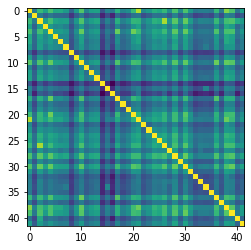

In [11]:
folder_path = '/content/shakespeares-works_TXT_FolgerShakespeare/Shakespeare'
file_content_corpus = []
filenames = []
for i in os.listdir(folder_path):
  if not i.startswith('__'):
    filenames.append(i)
    file_content = open(os.path.join(folder_path,i), 'r').read()
    file_content_corpus.append(file_content)
# file_content_corpus = " ".join(file_content_corpus)

vec = TfidfVectorizer()
X = vec.fit_transform(file_content_corpus)
cos_s = cosine_similarity(X, X)
plt.imshow(cos_s)

#### b) Use Doc2Vec to create document embeddings and find the similarities between the documents. To visualize this, also create a 42 x 42 heatmap for this.

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # This is added back by InteractiveShellApp.init_path()


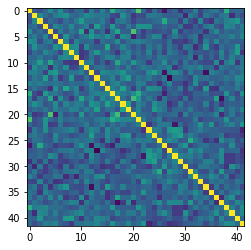

In [14]:
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(file_content_corpus)]

max_epochs, mxm = 50, 42

model = Doc2Vec(size=50, alpha=0.025, min_alpha=0.00025,min_count=1,dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(50):
    model.train(tagged_data,total_examples=model.corpus_count,epochs=model.iter)
    model.alpha -= 0.0002
    model.min_alpha = model.alpha

# creating a 42 cross 42 matrix of 1s
cos_s = []
for i in range(mxm):
    cos_s.append([])
    for j in range(mxm):
        cos_s[i].append(1)

for i in range(mxm):
  similarity1 = model.docvecs.most_similar(i,topn=42)
  for j in similarity1:
    islice = int(j[0])
    cos_s[i][islice] = j[1]

plt.imshow(cos_s)

In [15]:
similarity = model.docvecs.most_similar('1',topn=42)
similarity = sorted(similarity)
print('The similarity score for each each document is')
for i in similarity:
  print(i)

The similarity score for each each document is
('0', 0.21317525207996368)
('10', 0.32071197032928467)
('11', 0.4520968496799469)
('12', 0.38873761892318726)
('13', 0.34445664286613464)
('14', 0.3373895585536957)
('15', 0.3161478638648987)
('16', 0.1570507436990738)
('17', 0.11829528212547302)
('18', 0.4530378580093384)
('19', 0.29758116602897644)
('2', 0.4226939082145691)
('20', 0.0777827724814415)
('21', 0.17364826798439026)
('22', 0.1568813920021057)
('23', 0.3616968095302582)
('24', 0.34042978286743164)
('25', 0.3123493194580078)
('26', 0.24462229013442993)
('27', 0.22141726315021515)
('28', 0.24261243641376495)
('29', 0.28316381573677063)
('3', 0.3032825291156769)
('30', 0.02393375337123871)
('31', 0.36235252022743225)
('32', 0.28563550114631653)
('33', 0.12910181283950806)
('34', 0.3440837264060974)
('35', 0.2711251974105835)
('36', 0.1974915713071823)
('37', 0.3304848372936249)
('38', 0.3610646426677704)
('39', 0.047860078513622284)
('4', 0.2296040952205658)
('40', 0.239743232727

#### c) What are the differences you find between the two methods? Is there anything radically different? Please describe your answer in terms of the heatmap of part a and part b.
- This is a radical change. The heatmap of Doc2Vec is more dense meaning the similarity score measure depicted by Doc2Vec is much precise.

### Question 3) (30 points) Using the Homework 2 dataset. Use SpaCy to extract the following: 

### d) What do you think the most common bigrams and trigrams could be useful for? There is a particular method we have seen in this class to characterize a corpus that could benefit from having these bigrams/trigrams when the underlying text corpus can’t be shared. Please talk about this

In [7]:
!unzip /content/drive/MyDrive/Projects/NLP/shakespeares-works_TXT_FolgerShakespeare.zip
clear_output()

In [8]:
folder_path = '/content/shakespeares-works_TXT_FolgerShakespeare/Shakespeare'
file_content_corpus = []
filenames = []
for i in os.listdir(folder_path):
  if not i.startswith('__'):
    filenames.append(i)
    file_content = open(os.path.join(folder_path,i), 'r').read()
    file_content_corpus.append(file_content)
file_content_corpus = " ".join(file_content_corpus)

In [10]:
nlp.max_length = 60000000
doc = nlp(file_content_corpus)

### a) Write a function to generate all unique bigrams from all documents in the dataset. The input of this function should be the concatenated dataset and the output should be the list of bigrams and their frequency. Display the top 10 most common bigrams and their frequency

In [11]:
def unique_bigrams(dataset):
  bigramlist = []
  doc = nlp(dataset)
  bigramList, sentence = [], []
  for token in doc:
    if token.is_alpha:
      sentence.append(token)
  for word in range(len(sentence) - 1):
    first_word = sentence[word]
    second_word = sentence[word + 1]
    element = [first_word, second_word]
    bigramList.append(element)
  print(bigramList)
  bidict = {}
  bigram_new = []
  for i in bigramList:
      j = "".join(str(i))
      bigram_new.append(j)
  for i in bigram_new:
      if i in bidict:
          bidict[i]+=1
      else:
          bidict[i]=1
  return list(bidict.items())

In [12]:
# function call / output
# unique_bigrams()
toptenB = sorted(unique_bigrams('file_content_corpus of no where partying in tennessene and i came back')[:10])

[[of, no], [no, where], [where, partying], [partying, in], [in, tennessene], [tennessene, and], [and, i], [i, came], [came, back]]


[('[no, where]', 1), ('[of, no]', 1)]

In [14]:
print("Ten most common bigrams with their frequency are {} ".format(toptenB))

Ten most common bigrams with their frequency are [('[no, where]', 1), ('[of, no]', 1)] 


### b) Write a function to generate all unique trigrams from all documents in the dataset. The input of this function should be the concatenated dataset and the output should be the list of trigrams and their frequency. Display the top 10 most common trigrams and their frequency.

In [18]:
def unique_trigrams(dataset):
  trigramlist = []
  doc = nlp(dataset)
  trigramlist, sentence = [], []
  for token in doc:
    if token.is_alpha:
      sentence.append(token)
  for word in range(len(sentence) - 1):
    first_word = sentence[word]
    second_word = sentence[word + 1]
    third_word = sentence[word + 2]
    element = [first_word, second_word, third, third_word]
    trigramlist.append(element)
  print(trigramlist)
  tridict = {}
  trigram_new = []
  for i in trigramlist:
      j = "".join(str(i))
      trigram_new.append(j)
  for i in trigram_new:
      if i in tridict:
          tridict[i]+=1
      else:
          tridict[i]=1
  return list(tridict.items())

In [17]:
toptenT = sorted(unique_trigrams(file_content_corpus)[:10])

In [15]:
print("Ten most common trigrams with their frequency are {} ".format(toptenT))

### c) Write a function to extract all unique NOUN and VERB tokens. The input of this function should be the concatenated dataset and the output should be two lists: one of the NOUN tokens and their frequency, the other list should be the VERB tokens and their counts. Display the top 10 most common NOUN and VERB tokens.

In [20]:
def extractNV(dataset):
  nlp.max_length = 60000000
  doc = nlp(dataset)
  v_count, n_count = 0,0
  verb_tokens, noun_tokens = {}, {}
  for i in doc:
    if i.pos_=='VERB':
      if i in verb_tokens:
        verb_tokens[i.text]+=1
      else:
        verb_tokens[i.text]=1
    elif i.pos_=='NOUN':
      if i in noun_tokens:
        noun_tokens[i.text]+=1
      else:
        noun_tokens[i.text]=1
  return list(verb_tokens.items()), list(noun_tokens.items())

In [21]:
print(extractNV(file_content_corpus))

([('Edited', 1), ('Created', 1), ('dedicate', 1), ('beginning', 1), ('makes', 1), ('assured', 1), ('done', 1), ('devoted', 1), ('would', 1), ('show', 1), ('bound', 1), ('wish', 1), ('lengthened', 1), ('surnamed', 1), ('caused', 1)], [('version', 1), ('love', 1), ('Lordship', 1), ('end', 1), ('pamphlet', 1), ('moiety', 1), ('warrant', 1), ('disposition', 1), ('worth', 1), ('lines', 1), ('acceptance', 1), ('yours', 1), ('part', 1), ('duty', 1), ('life', 1), ('happiness', 1), ('ARGUMENT', 1), ('pride', 1)])


### d) What do you think the most common bigrams and trigrams could be useful for? There is a particular method we have seen in this class to characterize a corpus that could benefit from having these bigrams/trigrams when the underlying text corpus can’t be shared. Please talk about this

### Question 4) (30 points) Using the dataset: Ask0729, found in Exam files, write two functions to extract all dates found in this dataset. The input of these functions should take the dataset as input, and output a list of dates. You should use two different methods, one per function.  
### a) First method: using SpaCy (this is a big enough hint)

In [19]:
ask = open('Ask0729-fixed.txt', 'r')
ask = ask.read()
def date_extract(dataset):
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(dataset)
  datelist = []
  for i in doc.ents:
     if i.label_ == 'DATE':
       datelist.append(i.text)
  return datelist
date = date_extract(ask)
# sample output
date[:5], len(date)

(['up to 5 years', 'today', 'today', 'today', 'one week'], 1033)

### b) Second method: using regular expressions.

In [21]:
def date_extract_re(dataset):
  datex = r'(?:\d{1,2}[-/th|st|nd|rd\s.])?(?:(?:Jan|January|Feb|February|Mar|March|Apr|April|May|Jun|June|Jul|July|August|Sep|September|Oct|October|Nov|November|Dec|December)[\s,.])?(?:(?:\d{1,2})[-/th|st|nd|rd\s,.])?(?:\d{2,4})'
  datematch = re.findall(datex, ask)
  return datematch

### c) Print to screen to compare the results from the two functions.

In [20]:
# result from first function
print(date_extract(ask))

['up to 5 years', 'today', 'today', 'today', 'one week', 'MA 02143', 'daily', 'today', '3+ Nights & Save', 'this week', 'weekend', 'this week', '2 Weeks', 'the year', 'tomorrow', 'Wednesday', 'Saturday', 'the 6 year old', 'tomorrow', '25 years', 'year end 2000', 'under 40/over 40', 'junior-year', 'all summer', 'next week', 'yesterday', 'Monday', 'Thursday 4:00PM', 'July 31, 2014', '30 June 2012', 'April 15th', 'this year', 'this time', 'next year', 'years', 'Friday', 'Monday', 'December 7th', 'yesterday', 'yesterday', 'tomorrow', '14 day', '2 days', 'years', 'tomorrow', 'tomorrow', 'tomorrow', 'the next year', 'Sunday', 'a day', '12 MONTHS', 'July 4, 2012', 'Tomorrow', 'this week', 'Tuesday, March 20, 2001', 'annual', '21st Century', 'this week', 'tomorrow', 'next Wednesday', 'the old days', 'Next week', 'April', 'the 19th', 'August 31st', 'the year', 'only a week', 'June 23, 2000', 'today', 'Last week', 'Friday', 'the week', 'the 31st of March', '1 Year Giveaway', 'Thanksgiving', 'Tod

In [22]:
# result from second function
print(date_extract_re(ask))

['100', '500', '1000', '10', '125', '148', '46', '2788', '186', '28', '01', '186', '28', '01', '20', '519', '323', '0214', '30', '30', '150', '130', '25', '52', '2000', '40', '40', '40', '00', 'July 31', '2014', '30 June 2012', '20', 'April 15', '14', '25', '365', '100', '12', '300', '365', '9/11', '2012', '45', '38', 'March 20', '2001', '02', '14', '21', '800', '493', '9489', '100', '10', '276', '243', '1628', '276', '690', '7548', '832', '301', '8746', '7/12', '25', '19', 'August 31', 'June 23', '2000', '18', '16', '02', '30', '31', '30-45', '99', '99', '3/16', '1999', '2000', '2081', '900', '01', '2013', '18', '10', '33.23', '120', '50.00', '1850', '1940', 'February 28', '2014', '20', '30', '75', '2000', '11', '56,000', '25', 'April 2011', '02', '12/18/11', '03', '12/18/11', '04', '12/18/11', '05', '06', '12/18/11', '18', '1 19', '2 20', '3 21', '4 22', '5 23', '6 24', 'April 5-19', '15,000', '055', 'June 27', '2001', 'Jan 26', '30', 'January 15', '01', '28', 'August 2013', 'August 

#### d) Which one of the two approaches was better? Why do you think so? Would you use any of these approaches? Or a different one?
- Spacy was better because spacy identifies dates based on pre-trained corpus where as regular expression is purely based on rule based logic. The uniformity is not maintained in regular expression. I would prefer spacy but that is based on the dataset's contents only. Overall, I would prefer to use an hybrid approach.

### Question 5) (30 points) Train an LSTM model to classify the Cornell Movie Review data using the polarity_dataset V2.0. You can use the code for class 19, but take a note that you will have to adapt some of the parameters like: Review size = 450, epochs=5. You will use 85% of the dataset for training, and 15% for testing. Once you build the model, please display the sklearn classification report. What are you noticing here? Anything unexpected? How does this model compare to the one built with the IMDB dataset in class? Any ideas on how to improve it?

In [ ]:
# unzipping dataset
!rm -rf __MACOSX/ txt_sentoken/ Shakespeare/ shakespeares-works_TXT_FolgerShakespeare/
!unzip /content/drive/MyDrive/Projects/NLP/txt_sentoken.zip
clear_output()

In [ ]:
# creating set of documents i.e. list of all documents present in TRAINING folder
folder_path = '/content/txt_sentoken/'
file_content_corpus = []
target_label = []
# print(distance())
sub_folders = []
for i in os.walk(folder_path):
  sub_folders.append(i[0])
for folder in sub_folders:
  files = os.walk(folder).__next__()[-1]   
  for f in files:
    if not f.startswith('.'):                                                      
      file_content_corpus.append(open(os.path.join(folder, f),'r').read()) 
    # if os.path.join(folder,f) == '/content/exam1_dataset/TRAINING/negative/{}'.format(f)
    if folder=='/content/txt_sentoken/pos':
      target_label.append(1)
    elif folder=='/content/txt_sentoken/neg':
      target_label.append(0)

In [ ]:
np.random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(file_content_corpus, target_label, test_size=0.15)

In [ ]:
target_label[:2]

[0, 0]

In [ ]:
# Map for readable classnames
class_names = [0,1]

In [ ]:
data = X_train + X_test

In [ ]:
# PREPROCESSING
# lstm does not understand the words we need to encode it.
word_index = {}
# vocab_size = len(word_index)
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

# encoding via tokenizing is providing very low accuracy.
"""combine_data = ' '.join(data)
tokenized_data = word_tokenize(combine_data)
unique_tokens = set(tokenized_data)"""
# encoding manually by looping through each sentence.
"""start_count = 4 # because 4 keyvalues are set from 0-3
data = ''.join(data)
data = data.split(' ')
data = list(set(data))
for i in data:
    if i not in word_index:
        word_index[i] = start_count
        start_count+=1"""

# nested looping through tweets and words
start_count = 4
for i in data:
  for j in i.split(' '):
    if j not in word_index:
      word_index[j] = start_count
      start_count += 1


# encoding technique-1# perform encoding by allocating random integers to each unique word
"""from random import randint
i = 4
testing = [i += 1 word_index[word] = i for i in data for j in i.split(' ') if j not in word_index]"""

"from random import randint\ni = 4\ntesting = [i += 1 word_index[word] = i for i in data for j in i.split(' ') if j not in word_index]"

In [ ]:
# splitting the encoded values 

"""
X_train_encode, X_test_encode = train_test_split(list(word_index.values),random_state=2361)
"""
X_train_encode=[]
for tweet in X_train:
    xtrain_list = []
    for i in tweet.split(' '):
      xtrain_list.append(word_index[i])
        # try:
  
        # except:
            # continue
    X_train_encode.append(xtrain_list)
X_test_encode=[]
for ttweet in X_test:
    xtest_list = []
    for i in ttweet.split(' '):
      xtest_list.append(word_index[i])
        # try:
            
        # except:
        #     continue
    X_test_encode.append(xtest_list)

In [ ]:
#converting back the train_test split list variable to nDarray
# X_train, X_test, y_train, y_test = np.ravel(X_train), np.ravel(X_test), np.ravel(y_train), np.ravel(y_test)
X_train = np.array(X_train_encode)
X_test = np.array(X_test_encode) 
y_train = np.array(y_train)
y_test = np.array(y_test)

review_length = 450

X_train = sequence.pad_sequences(X_train, maxlen = review_length)
X_test = sequence.pad_sequences(X_test, maxlen = review_length)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = len(word_index), # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = review_length # Length of input sequences
    )
)
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)
model.add(
    tf.keras.layers.LSTM(
        units=32 
    )
)
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)
model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 450, 32)           1798496   
_________________________________________________________________
dropout (Dropout)            (None, 450, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,806,849
Trainable params: 1,806,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_tensor = tf.convert_to_tensor(X_train, dtype=tf.int32)
y_tensor1 = tf.convert_to_tensor(y_train, dtype=tf.int32)
history = model.fit(y_tensor, y_tensor1,batch_size=256,epochs=5,validation_split=0.2,verbose=1)

Epoch 1/5
6/6 [==============================] - 34s 164ms/step - loss: 0.6932 - accuracy: 0.5089 - val_loss: 0.6930 - val_accuracy: 0.4941
Epoch 2/5
6/6 [==============================] - 0s 72ms/step - loss: 0.6926 - accuracy: 0.5202 - val_loss: 0.6925 - val_accuracy: 0.5088
Epoch 3/5
6/6 [==============================] - 0s 72ms/step - loss: 0.6910 - accuracy: 0.5478 - val_loss: 0.6920 - val_accuracy: 0.5118
Epoch 4/5
6/6 [==============================] - 0s 67ms/step - loss: 0.6890 - accuracy: 0.5347 - val_loss: 0.6912 - val_accuracy: 0.5118
Epoch 5/5
6/6 [==============================] - 0s 68ms/step - loss: 0.6851 - accuracy: 0.5495 - val_loss: 0.6894 - val_accuracy: 0.5294


In [ ]:
predicted_classes = model.predict_classes(X_test)
classification_report = classification_report(y_test, predicted_classes) # 0 - negative, 1 - positive
print(classification_report)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.73      0.05      0.09       164
           1       0.46      0.98      0.63       136

    accuracy                           0.47       300
   macro avg       0.59      0.51      0.36       300
weighted avg       0.61      0.47      0.33       300



#### What are you noticing here? Anything unexpected? 
 - The accuracy is nearly 50% on average. This is unexpected.

#### How does this model compare to the one built with the IMDB dataset in class?
In both the cases the accuracy increases with every epoch but in Cornless Dataset it is only marginal increase. Comparing IMDB and Cornell's classification report. The weighted average values are more uniform in IMDB dataset.

#### Any ideas on how to improve it?
- Increase the dataset size.

#### Question 6) (30 points) Use the train.txt file from the PubMed 20K RCT dataset(https://github.com/Franck-Dernoncourt/pubmed-rct/tree/master/PubMed_20k_RCT) fine-tune a BERT transformer (class 9 code). This task is a bit different as the one seen in class, here the source dataset has FIVE different classes: background, objective, method, result, and conclusion. Once the BERT model is fine-tuned, classify the: test.txt set. Please present the per-class classification report (accuracy, precision, recall, f1-score metrics). Also, present the global metrics - all classes (accuracy, precision, recall, f1-score metrics). Did you model beat the baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve it

In [4]:
# !wget "https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/master/PubMed_20k_RCT/train.txt" -O q6_train.txt
# !wget "https://github.com/Franck-Dernoncourt/pubmed-rct/blob/master/PubMed_20k_RCT/test.txt" -O q6_test.txt
!wget "https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/master/PubMed_20k_RCT/train.txt?raw=true" -O q6_train.txt
!wget "https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/master/PubMed_20k_RCT/train.txt?raw=true" -O q6_test.txt
clear_output()

In [42]:
!head q6_train.txt

###24293578
OBJECTIVE	To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
METHODS	A total of 125 patients with primary knee OA were randomized 1:1 ; 63 received 7.5 mg/day of prednisolone and 62 received placebo for 6 weeks .
METHODS	Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .
METHODS	Pain was assessed using the visual analog pain scale ( 0-100 mm ) .
METHODS	Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and 6-min walk distance ( 6MWD ) .
METHODS	Serum levels of interleukin 1 ( IL-1 ) , IL-6 , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein

In [43]:
with open('q6_train.txt', 'r') as f:
    train_data = f.read()

In [44]:
lines = train_data.split('\n')
five_labels = ['OBJECTIVE','METHODS','RESULTS','CONCLUSIONS','BACKGROUND']

In [45]:
# llen = int(0.9*len(lines))
# llen

In [46]:
X= []
y = []

In [47]:
for line in lines:
  if(len(line.split('\t')) == 2):
    label, pct = line.split('\t')
    if (label in five_labels):
      X.append(pct)
      y.append(five_labels.index(label))

In [48]:
sentences = X
labels = y

In [49]:
import os
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [28]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
Token IDs: tensor([  101,  2000,  8556,  1996, 21150,  1997,  1020,  3134,  1997,  3679,
         2659,  1011, 13004,  8700,  3653,  2094,  8977, 12898,  2638,  1999,
         9229,  3255,  1010, 12969,  1010,  1998, 22575,  2659,  1011,  3694,
        21733,  1999,  1996,  2460,  2744,  1998,  3251,  1996,  3466,  2052,
         2022,  8760,  2012,  2260,  3134,  1999,  3080,  6001,  2007,  8777,
         2000,  5729,  6181,  9808,  2618, 10441, 15265, 14778,  2483,  1006,
         1051,  2050,  1007,   102])


In [29]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

162,036 training samples
18,004 validation samples


In [50]:
# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

#### Loading and Training the model

In [51]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [52]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [53]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [54]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [55]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [56]:
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  5,064.    Elapsed: 0:00:13.
  Batch    80  of  5,064.    Elapsed: 0:00:27.
  Batch   120  of  5,064.    Elapsed: 0:00:40.
  Batch   160  of  5,064.    Elapsed: 0:00:54.
  Batch   200  of  5,064.    Elapsed: 0:01:08.
  Batch   240  of  5,064.    Elapsed: 0:01:22.
  Batch   280  of  5,064.    Elapsed: 0:01:36.
  Batch   320  of  5,064.    Elapsed: 0:01:50.
  Batch   360  of  5,064.    Elapsed: 0:02:04.
  Batch   400  of  5,064.    Elapsed: 0:02:18.
  Batch   440  of  5,064.    Elapsed: 0:02:33.
  Batch   480  of  5,064.    Elapsed: 0:02:47.
  Batch   520  of  5,064.    Elapsed: 0:03:01.
  Batch   560  of  5,064.    Elapsed: 0:03:15.
  Batch   600  of  5,064.    Elapsed: 0:03:30.
  Batch   640  of  5,064.    Elapsed: 0:03:44.
  Batch   680  of  5,064.    Elapsed: 0:03:58.
  Batch   720  of  5,064.    Elapsed: 0:04:13.
  Batch   760  of  5,064.    Elapsed: 0:04:27.
  Batch   800  of  5,064.    Elapsed: 0:04:41.
  Batch   840  of

In [57]:
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.41,0.37,0.87,0:30:05,0:01:06
2,0.31,0.36,0.87,0:30:10,0:01:06
3,0.25,0.39,0.87,0:30:10,0:01:06
4,0.20,0.43,0.87,0:30:10,0:01:06


In [59]:
with open('q6_test.txt', 'r') as f:
    train_data = f.read()
lines = train_data.split('\n')
five_labels = ['OBJECTIVE','METHODS','RESULTS','CONCLUSIONS','BACKGROUND']
X= []
y = []
for line in lines:
  if(len(line.split('\t')) == 2):
    label, pct = line.split('\t')
    if (label in five_labels):
      X.append(pct)
      y.append(five_labels.index(label))
sentences = X
labels = y

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


#### Evaluation on Test Data

In [75]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 180,040 test sentences...
    DONE.


In [81]:
len(predictions), len(true_labels)

(5627, 5627)

In [82]:

f1 = f1_score(labels.flatten(), np.argmax(predictions, axis=0).flatten(), average='weighted')
acc= accuracy_score(labels.flatten(), np.argmax(predictions, axis=1).flatten())
precision = precision_score(labels.flatten(),np.argmax(predictions, axis=1).flatten())
recall = recall_score(labels.flatten(),np.argmax(predictions, axis=1).flatten())
#class level accuracy
predictions_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = labels.flatten()
for label in np.unique(labels_flat):
    y_predictions = predictions_flat[labels_flat==label]
    y_true = labels_flat[labels_flat==label]
    print(f'Class: {label_dict[label]}')
    print(f'Accuracy: {len(y_predictions[y_predictions==label])}/{len(y_true)}\n')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: ignored

In [65]:
predictions[0]

array([[ 5.8232145 , -2.0920217 , -3.7299933 , -2.654709  ,  1.5410722 ],
       [-1.525281  ,  6.388547  ,  0.34785506, -3.814616  , -1.5841421 ],
       [-0.816647  ,  4.9769335 ,  0.5543224 , -3.7431638 , -1.3238596 ],
       [-1.2828058 ,  6.247549  , -0.15586866, -3.6116688 , -1.6498828 ],
       [-0.75484574,  5.626166  , -0.00945846, -4.241919  , -1.1067168 ],
       [-1.2156655 ,  5.726096  ,  1.123415  , -3.9201555 , -1.7457263 ],
       [-3.3304958 , -1.2500113 ,  6.498452  ,  1.7350141 , -2.7433114 ],
       [-3.0627828 ,  0.41246885,  6.1693068 , -0.9531187 , -2.2974741 ],
       [-3.0556512 , -2.0077312 ,  5.989752  ,  2.6481817 , -2.5036788 ],
       [-2.8040762 ,  0.10028925,  6.006577  , -0.6203381 , -2.4171815 ],
       [-3.043339  ,  1.8088124 ,  5.658327  , -1.9199462 , -2.2659333 ],
       [-1.1644218 , -2.0514505 , -1.827896  ,  6.2746367 , -0.41282725],
       [ 3.959795  , -2.4701176 , -3.6191666 , -1.8796208 ,  4.05325   ],
       [ 3.610219  , -2.794104  , -3.6

In [74]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Calculating Matthews Corr. Coef. for each batch...
Total MCC: 0.919


In [ ]:
# #  performance metrics 
# ma_cv_acc = accuracy_score(may_test,mac_predict)
# ma_cv_pre = precision_score(may_test,mac_predict)
# ma_cv_re = recall_score(may_test,mac_predict)
# ma_cv_f1 = f1_score(mac_predict, may_test, average='macro')

In [66]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.txt',
 './model_save/added_tokens.json')

In [69]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Copy the model files to a directory in your Google Drive.
!cp -r ./model_save/ "./drive/MyDrive/models/" 

In [ ]:
# # Load a trained model and vocabulary that you have fine-tuned
# model = model_class.from_pretrained(output_dir)
# tokenizer = tokenizer_class.from_pretrained(output_dir)

# # Copy the model to the GPU.
# model.to(device)

#### Did you model beat the baseline results (https://arxiv.org/pdf/1710.06071.pdf)? 

#### What do you think you can do to improve it

#### Bonus Question: (50 points) Solve question 6 but instead for fine-tuning BERT, use: BioBert (20 points) and BlueBERT (20 points) and compare the results of the three approaches in a nice table. Answer the following questions: Did you model beat the baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve it?